[All Disk Galaxies, $\frac{M_{bulge}}{M_{star}}$<0.4: RF, Feature Ranking and SR equation search by morphology](#1)

[Groups 1-4: RF and Feature Ranking](#2)

[Groups 1-4: SR equation search](#3)

[Elliptical Galaxies, 0.4< $\frac{M_{bulge}}{M_{star}}$<0.8: RF, Feature Ranking and SR equation search by morphology](#4)

[Groups 5-8: RF and Feature Ranking](#5)

[Groups 5-8: SR equation search](#6)


In [122]:
import time
import numpy as np
import pandas as pd

import galsim #install with conda install -c conda_forge galsim

import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.colors as norm
from matplotlib.gridspec import SubplotSpec
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline #This allows one to build different steps together
from sklearn.preprocessing import StandardScaler, RobustScaler

from tqdm import tqdm 

import target_predicting_ML_functions_and_feature_ranking as functions
import RF_target_predicting_and_learning_curves_functions as tp_lc_functions

from scipy.optimize import curve_fit

## <font color='purple'> <a id =1> </a> <br> All Disk Galaxies, $\frac{M_{bulge}}{M_{star}}$<0.4, Groups 1-4: RF, Feature Ranking and SR equation search by morphology

### <font color='purple'> <a id =2> </a> <br> Groups 1-4: RF and Feature Ranking 

In [2]:
import os
# os.mkdir('TNG300-SAM_images/v7_TNG300-SAM_df_14')

In [3]:
df_14 = pd.read_csv('TNG300-SAM_images/v6_TNG300-SAM_Morphologies_definition/df_14_Normalized_as_defined_in_TNG300notebook_v6')
df_14_raw = pd.read_csv('TNG300-SAM_images/v6_TNG300-SAM_Morphologies_definition/df_14_Raw_as_defined_in_TNG300notebook_v6')
print("df_14.shape", df_14.shape)
print("df_14_raw.shape", df_14_raw.shape)

df_14.shape (158501, 38)
df_14_raw.shape (158501, 59)


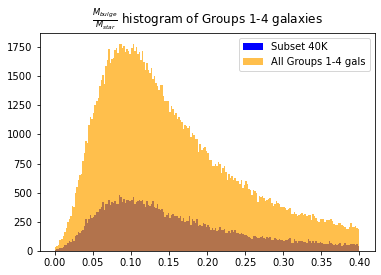

In [6]:
# choose a subsample of 40K galaxies since the original dataset is too large
df_14_sample = df_14.sample(n = 40000, random_state = 2023)

plt.hist(df_14_sample.BulgeMstar_ratio, color='blue', label='Subset 40K', range=(0.0,0.4), bins=200)
plt.hist(df_14.BulgeMstar_ratio,  color='orange', 
         label='All Groups 1-4 gals', alpha=0.7, range=(0.0,0.4), bins=200)
plt.title(r'$\frac{M_{bulge}}{M_{star}}$ histogram of Groups 1-4 galaxies')
plt.legend()
# plt.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_df_14_BulgeMstar_ratio_histogram_all_vs_40kdataset.jpeg', dpi=500)
plt.show()

In [7]:
X_14_sample = df_14_sample.drop(columns=['GalpropNormHalfRadius', 'BulgeMstar_ratio',
                         'GalpropNormMdisk', 'DiskMstar_ratio'])
 

y_14_sample = df_14_sample.loc[:,'GalpropNormHalfRadius']

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params, best score: 0.9843 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
RF Accuracy: 0.98 (+/- 0.00)


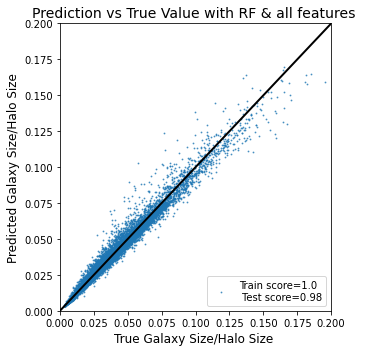

Elapsed time to compute the importances: 0.091 seconds
Elapsed time to compute the importances: 69.778 seconds


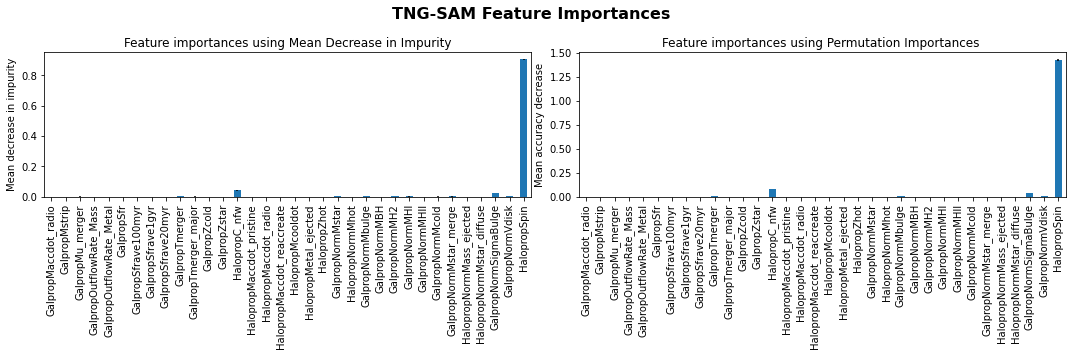

  0%|                                                    | 0/34 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▎                                          | 1/34 [00:04<02:25,  4.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▌                                         | 2/34 [00:13<03:50,  7.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|███▉                                        | 3/34 [00:23<04:27,  8.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▏                                      | 4/34 [00:33<04:29,  8.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▍                                     | 5/34 [00:41<04:12,  8.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|███████▊                                    | 6/34 [00:49<03:54,  8.36s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████                                   | 7/34 [00:57<03:41,  8.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▎                                 | 8/34 [01:05<03:35,  8.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▋                                | 9/34 [01:13<03:25,  8.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▋                              | 10/34 [01:19<02:59,  7.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|█████████████▉                             | 11/34 [01:23<02:27,  6.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▏                           | 12/34 [01:33<02:45,  7.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▍                          | 13/34 [01:41<02:41,  7.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▋                         | 14/34 [01:49<02:36,  7.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▉                        | 15/34 [01:56<02:20,  7.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████▏                      | 16/34 [02:00<01:58,  6.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 17/34 [02:09<02:04,  7.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▊                    | 18/34 [02:17<01:57,  7.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████                   | 19/34 [02:25<01:53,  7.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▎                 | 20/34 [02:33<01:48,  7.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▌                | 21/34 [02:41<01:42,  7.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▊               | 22/34 [02:49<01:32,  7.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████              | 23/34 [02:57<01:26,  7.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▎            | 24/34 [02:59<01:00,  6.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▌           | 25/34 [03:08<01:02,  6.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▉          | 26/34 [03:16<00:57,  7.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|██████████████████████████████████▏        | 27/34 [03:22<00:49,  7.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▍       | 28/34 [03:30<00:43,  7.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▋      | 29/34 [03:39<00:38,  7.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▉     | 30/34 [03:48<00:32,  8.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|███████████████████████████████████████▏   | 31/34 [03:53<00:22,  7.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▍  | 32/34 [04:01<00:15,  7.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▋ | 33/34 [04:09<00:07,  7.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 34/34 [04:15<00:00,  7.51s/it]


1. iteration: 
	 1 HalopropSpin 0.907514213325463


  0%|                                                    | 0/33 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▎                                          | 1/33 [00:11<05:53, 11.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▋                                         | 2/33 [00:23<06:15, 12.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|████                                        | 3/33 [00:35<05:55, 11.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▎                                      | 4/33 [00:45<05:25, 11.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▋                                     | 5/33 [00:55<05:04, 10.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|████████                                    | 6/33 [01:07<05:00, 11.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████▎                                  | 7/33 [01:19<04:54, 11.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▋                                 | 8/33 [01:30<04:38, 11.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|████████████                                | 9/33 [01:41<04:30, 11.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████                              | 10/33 [01:52<04:13, 11.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▎                            | 11/33 [02:00<03:44, 10.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▋                           | 12/33 [02:12<03:43, 10.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▉                          | 13/33 [02:23<03:38, 10.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████▏                        | 14/33 [02:37<03:41, 11.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▌                       | 15/33 [02:46<03:17, 10.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 16/33 [02:57<03:05, 10.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 17/33 [03:10<03:05, 11.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▍                   | 18/33 [03:21<02:52, 11.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▊                  | 19/33 [03:33<02:42, 11.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████                 | 20/33 [03:45<02:31, 11.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▎               | 21/33 [03:58<02:25, 12.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 22/33 [04:11<02:14, 12.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|█████████████████████████████▉             | 23/33 [04:23<02:03, 12.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▎           | 24/33 [04:35<01:49, 12.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▌          | 25/33 [04:48<01:38, 12.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|█████████████████████████████████▉         | 26/33 [04:59<01:24, 12.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▏       | 27/33 [05:09<01:08, 11.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▍      | 28/33 [05:20<00:57, 11.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▊     | 29/33 [05:32<00:45, 11.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|███████████████████████████████████████    | 30/33 [05:43<00:34, 11.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▍  | 31/33 [05:54<00:22, 11.36s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▋ | 32/33 [06:07<00:11, 11.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 33/33 [06:20<00:00, 11.52s/it]


2. iteration: 
	 1 HalopropSpin 0.907514213325463
	 2 HalopropC_nfw 0.9593035416599681


  0%|                                                    | 0/32 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/32 [00:17<09:14, 17.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▊                                         | 2/32 [00:36<09:13, 18.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|████▏                                       | 3/32 [00:56<09:18, 19.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▌                                      | 4/32 [01:16<09:06, 19.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|██████▉                                     | 5/32 [01:35<08:35, 19.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▎                                   | 6/32 [01:53<08:07, 18.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▋                                  | 7/32 [02:11<07:42, 18.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 8/32 [02:29<07:18, 18.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▍                               | 9/32 [02:47<06:58, 18.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▍                             | 10/32 [03:04<06:32, 17.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 34%|██████████████▊                            | 11/32 [03:19<05:57, 17.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▏                          | 12/32 [03:37<05:45, 17.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▍                         | 13/32 [03:55<05:31, 17.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▊                        | 14/32 [04:10<05:05, 16.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████▏                      | 15/32 [04:28<04:49, 17.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 16/32 [04:45<04:36, 17.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▊                    | 17/32 [05:03<04:20, 17.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████▏                  | 18/32 [05:21<04:06, 17.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▌                 | 19/32 [05:39<03:51, 17.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▉                | 20/32 [05:58<03:36, 18.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 66%|████████████████████████████▏              | 21/32 [06:16<03:18, 18.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▌             | 22/32 [06:35<03:01, 18.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|██████████████████████████████▉            | 23/32 [06:50<02:37, 17.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 24/32 [07:10<02:24, 18.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▌         | 25/32 [07:28<02:07, 18.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▉        | 26/32 [07:47<01:50, 18.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████▎      | 27/32 [08:06<01:33, 18.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▋     | 28/32 [08:25<01:15, 18.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|██████████████████████████████████████▉    | 29/32 [08:45<00:56, 18.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▎  | 30/32 [09:03<00:37, 18.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▋ | 31/32 [09:22<00:18, 18.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 32/32 [09:40<00:00, 18.14s/it]


3. iteration: 
	 1 HalopropSpin 0.907514213325463
	 2 HalopropC_nfw 0.9593035416599681
	 3 GalpropNormSigmaBulge 0.9714015313937755


  0%|                                                    | 0/31 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/31 [00:24<12:05, 24.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▊                                         | 2/31 [00:49<12:00, 24.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▎                                       | 3/31 [01:15<11:45, 25.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▋                                      | 4/31 [01:42<11:47, 26.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|███████                                     | 5/31 [02:09<11:20, 26.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▌                                   | 6/31 [02:39<11:30, 27.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|█████████▉                                  | 7/31 [03:07<11:05, 27.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▎                                | 8/31 [03:34<10:33, 27.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▊                               | 9/31 [04:03<10:12, 27.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|█████████████▊                             | 10/31 [04:31<09:46, 27.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▎                           | 11/31 [04:54<08:49, 26.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▋                          | 12/31 [05:20<08:20, 26.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████                         | 13/31 [05:48<08:01, 26.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▍                       | 14/31 [06:11<07:16, 25.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 15/31 [06:35<06:44, 25.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 16/31 [07:00<06:15, 25.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▌                   | 17/31 [07:23<05:44, 24.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▉                  | 18/31 [07:47<05:18, 24.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████▎                | 19/31 [08:11<04:51, 24.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▋               | 20/31 [08:35<04:26, 24.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 21/31 [08:59<04:00, 24.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▌            | 22/31 [09:26<03:43, 24.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▉           | 23/31 [09:48<03:13, 24.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████▎         | 24/31 [10:14<02:53, 24.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▋        | 25/31 [10:40<02:29, 24.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████       | 26/31 [11:05<02:05, 25.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▍     | 27/31 [11:30<01:40, 25.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▊    | 28/31 [11:56<01:15, 25.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▏  | 29/31 [12:19<00:49, 24.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 30/31 [12:44<00:24, 24.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 31/31 [13:07<00:00, 25.39s/it]


4. iteration: 
	 1 HalopropSpin 0.907514213325463
	 2 HalopropC_nfw 0.9593035416599681
	 3 GalpropNormSigmaBulge 0.9714015313937755
	 4 GalpropTmerger 0.9780648753830881


  0%|                                                    | 0/30 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/30 [00:29<14:24, 29.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|██▉                                         | 2/30 [00:59<13:57, 29.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▍                                       | 3/30 [01:29<13:24, 29.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▊                                      | 4/30 [01:59<12:56, 29.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▎                                    | 5/30 [02:29<12:27, 29.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 6/30 [02:59<11:56, 29.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████▎                                 | 7/30 [03:28<11:26, 29.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▋                                | 8/30 [03:59<11:01, 30.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████▏                              | 9/30 [04:29<10:31, 30.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▎                            | 10/30 [04:55<09:38, 28.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|███████████████▊                           | 11/30 [05:25<09:11, 29.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▏                         | 12/30 [05:54<08:42, 29.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▋                        | 13/30 [06:21<08:04, 28.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████                       | 14/30 [06:49<07:36, 28.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 15/30 [07:20<07:15, 29.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▉                    | 16/30 [07:49<06:48, 29.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▎                  | 17/30 [08:19<06:21, 29.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 18/30 [08:48<05:52, 29.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████▏               | 19/30 [09:18<05:23, 29.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 20/30 [09:47<04:54, 29.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████             | 21/30 [10:17<04:25, 29.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▌           | 22/30 [10:47<03:56, 29.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|████████████████████████████████▉          | 23/30 [11:16<03:26, 29.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 24/30 [11:46<02:56, 29.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▊       | 25/30 [12:15<02:27, 29.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▎     | 26/30 [12:44<01:57, 29.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▋    | 27/30 [13:14<01:28, 29.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████▏  | 28/30 [13:43<00:58, 29.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 29/30 [14:13<00:29, 29.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 30/30 [14:42<00:00, 29.41s/it]


5. iteration: 
	 1 HalopropSpin 0.907514213325463
	 2 HalopropC_nfw 0.9593035416599681
	 3 GalpropNormSigmaBulge 0.9714015313937755
	 4 GalpropTmerger 0.9780648753830881
	 5 GalpropNormMcold 0.982638230039134


  0%|                                                    | 0/29 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▌                                          | 1/29 [00:34<16:06, 34.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███                                         | 2/29 [01:09<15:38, 34.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▌                                       | 3/29 [01:44<15:05, 34.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████                                      | 4/29 [02:19<14:31, 34.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▌                                    | 5/29 [02:54<13:59, 35.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████                                   | 6/29 [03:29<13:24, 34.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▌                                 | 7/29 [04:04<12:50, 35.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▏                               | 8/29 [04:39<12:15, 35.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▋                              | 9/29 [05:14<11:41, 35.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 34%|██████████████▊                            | 10/29 [05:46<10:48, 34.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▎                          | 11/29 [06:21<10:19, 34.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▊                         | 12/29 [06:57<09:49, 34.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▎                       | 13/29 [07:29<09:05, 34.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 14/29 [08:04<08:33, 34.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 15/29 [08:39<08:02, 34.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▋                   | 16/29 [09:14<07:28, 34.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▏                 | 17/29 [09:48<06:55, 34.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▋                | 18/29 [10:23<06:22, 34.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 66%|████████████████████████████▏              | 19/29 [10:58<05:47, 34.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▋             | 20/29 [11:33<05:13, 34.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|███████████████████████████████▏           | 21/29 [12:08<04:39, 34.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▌          | 22/29 [12:43<04:03, 34.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|██████████████████████████████████         | 23/29 [13:18<03:29, 34.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▌       | 24/29 [13:53<02:53, 34.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|█████████████████████████████████████      | 25/29 [14:27<02:18, 34.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▌    | 26/29 [15:02<01:44, 34.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████   | 27/29 [15:37<01:09, 34.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 28/29 [16:12<00:34, 34.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 29/29 [16:47<00:00, 34.74s/it]


6. iteration: 
	 1 HalopropSpin 0.907514213325463
	 2 HalopropC_nfw 0.9593035416599681
	 3 GalpropNormSigmaBulge 0.9714015313937755
	 4 GalpropTmerger 0.9780648753830881
	 5 GalpropNormMcold 0.982638230039134
	 6 GalpropNormMbulge 0.9839699069005933


  0%|                                                    | 0/28 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▌                                          | 1/28 [00:40<18:03, 40.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███▏                                        | 2/28 [01:20<17:32, 40.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▋                                       | 3/28 [02:01<16:52, 40.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████▎                                     | 4/28 [02:41<16:12, 40.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|███████▊                                    | 5/28 [03:22<15:34, 40.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████▍                                  | 6/28 [04:03<14:53, 40.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 7/28 [04:43<14:12, 40.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▌                               | 8/28 [05:24<13:33, 40.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████▏                             | 9/28 [06:05<12:51, 40.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▎                           | 10/28 [06:43<11:55, 39.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▉                          | 11/28 [07:23<11:20, 40.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▍                        | 12/28 [08:04<10:43, 40.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▉                       | 13/28 [08:43<09:56, 39.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 14/28 [09:23<09:17, 39.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████                    | 15/28 [10:03<08:41, 40.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▌                  | 16/28 [10:44<08:01, 40.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████                 | 17/28 [11:24<07:23, 40.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▋               | 18/28 [12:05<06:44, 40.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 19/28 [12:46<06:04, 40.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▋            | 20/28 [13:26<05:24, 40.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 21/28 [14:06<04:42, 40.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|█████████████████████████████████▊         | 22/28 [14:47<04:02, 40.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▎       | 23/28 [15:27<03:22, 40.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|████████████████████████████████████▊      | 24/28 [16:08<02:42, 40.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▍    | 25/28 [16:49<02:01, 40.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|███████████████████████████████████████▉   | 26/28 [17:29<01:21, 40.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▍ | 27/28 [18:10<00:40, 40.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 28/28 [18:50<00:00, 40.37s/it]


7. iteration: 
	 1 HalopropSpin 0.907514213325463
	 2 HalopropC_nfw 0.9593035416599681
	 3 GalpropNormSigmaBulge 0.9714015313937755
	 4 GalpropTmerger 0.9780648753830881
	 5 GalpropNormMcold 0.982638230039134
	 6 GalpropNormMbulge 0.9839699069005933
	 7 GalpropNormMstar 0.9844076824112746


  0%|                                                    | 0/27 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▋                                          | 1/27 [00:45<19:42, 45.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███▎                                        | 2/27 [01:31<19:04, 45.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▉                                       | 3/27 [02:17<18:22, 45.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▌                                     | 4/27 [03:03<17:38, 46.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▏                                   | 5/27 [03:49<16:52, 46.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▊                                  | 6/27 [04:36<16:08, 46.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▍                                | 7/27 [05:14<14:31, 43.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████                               | 8/27 [06:00<14:05, 44.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 9/27 [06:47<13:30, 45.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|███████████████▉                           | 10/27 [07:30<12:36, 44.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▌                         | 11/27 [08:16<12:00, 45.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|███████████████████                        | 12/27 [09:02<11:20, 45.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▋                      | 13/27 [09:47<10:30, 45.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▎                    | 14/27 [10:32<09:47, 45.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|███████████████████████▉                   | 15/27 [11:19<09:06, 45.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▍                 | 16/27 [12:04<08:21, 45.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████                | 17/27 [12:50<07:37, 45.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 18/27 [13:37<06:53, 45.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████▎            | 19/27 [14:23<06:07, 45.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▊           | 20/27 [15:08<05:20, 45.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▍         | 21/27 [15:54<04:35, 45.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|███████████████████████████████████        | 22/27 [16:40<03:49, 45.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▋      | 23/27 [17:26<03:03, 45.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▏    | 24/27 [18:13<02:18, 46.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|███████████████████████████████████████▊   | 25/27 [18:59<01:32, 46.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▍ | 26/27 [19:45<00:46, 46.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 27/27 [20:31<00:00, 45.60s/it]


8. iteration: 
	 1 HalopropSpin 0.907514213325463
	 2 HalopropC_nfw 0.9593035416599681
	 3 GalpropNormSigmaBulge 0.9714015313937755
	 4 GalpropTmerger 0.9780648753830881
	 5 GalpropNormMcold 0.982638230039134
	 6 GalpropNormMbulge 0.9839699069005933
	 7 GalpropNormMstar 0.9844076824112746
	 8 GalpropNormMHII 0.9850168321831245


  0%|                                                    | 0/26 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▋                                          | 1/26 [00:51<21:26, 51.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▍                                        | 2/26 [01:42<20:35, 51.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████                                       | 3/26 [02:34<19:43, 51.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▊                                     | 4/26 [03:25<18:52, 51.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▍                                   | 5/26 [04:18<18:10, 51.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████▏                                 | 6/26 [05:10<17:18, 51.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▊                                | 7/26 [06:02<16:26, 51.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▌                              | 8/26 [06:54<15:34, 51.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▏                            | 9/26 [07:45<14:40, 51.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▌                          | 10/26 [08:34<13:32, 50.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████▏                        | 11/26 [09:27<12:51, 51.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▊                       | 12/26 [10:19<12:02, 51.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 13/26 [11:09<11:04, 51.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████▏                   | 14/26 [12:00<10:13, 51.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▊                  | 15/26 [12:52<09:24, 51.36s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▍                | 16/26 [13:43<08:32, 51.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|████████████████████████████               | 17/26 [14:34<07:42, 51.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▊             | 18/26 [15:26<06:51, 51.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▍           | 19/26 [16:18<06:00, 51.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████          | 20/26 [17:09<05:08, 51.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▋        | 21/26 [18:01<04:17, 51.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▍      | 22/26 [18:52<03:26, 51.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|██████████████████████████████████████     | 23/26 [19:44<02:34, 51.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▋   | 24/26 [20:37<01:43, 51.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▎ | 25/26 [21:29<00:51, 51.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 26/26 [22:20<00:00, 51.56s/it]


9. iteration: 
	 1 HalopropSpin 0.907514213325463
	 2 HalopropC_nfw 0.9593035416599681
	 3 GalpropNormSigmaBulge 0.9714015313937755
	 4 GalpropTmerger 0.9780648753830881
	 5 GalpropNormMcold 0.982638230039134
	 6 GalpropNormMbulge 0.9839699069005933
	 7 GalpropNormMstar 0.9844076824112746
	 8 GalpropNormMHII 0.9850168321831245
	 9 GalpropNormMHI 0.985168946491418


  0%|                                                    | 0/25 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▊                                          | 1/25 [00:56<22:38, 56.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▌                                        | 2/25 [01:53<21:48, 56.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▎                                      | 3/25 [02:50<20:51, 56.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|███████                                     | 4/25 [03:47<19:54, 56.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 5/25 [04:44<18:57, 56.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▌                                 | 6/25 [05:41<18:02, 56.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▎                               | 7/25 [06:38<17:06, 57.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████                              | 8/25 [07:35<16:09, 57.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▊                            | 9/25 [08:33<15:17, 57.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▏                         | 10/25 [09:27<14:06, 56.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▉                        | 11/25 [10:25<13:12, 56.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▋                      | 12/25 [11:21<12:17, 56.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▎                    | 13/25 [12:17<11:14, 56.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████                   | 14/25 [13:13<10:19, 56.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 15/25 [14:10<09:24, 56.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▌               | 16/25 [15:06<08:28, 56.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 17/25 [16:03<07:32, 56.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|██████████████████████████████▉            | 18/25 [17:00<06:36, 56.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▋          | 19/25 [17:57<05:40, 56.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 20/25 [18:53<04:43, 56.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████       | 21/25 [19:50<03:46, 56.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▊     | 22/25 [20:47<02:50, 56.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▌   | 23/25 [21:44<01:53, 56.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▎ | 24/25 [22:41<00:56, 56.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 25/25 [23:37<00:00, 56.72s/it]

10. iteration: 
	 1 HalopropSpin 0.907514213325463
	 2 HalopropC_nfw 0.9593035416599681
	 3 GalpropNormSigmaBulge 0.9714015313937755
	 4 GalpropTmerger 0.9780648753830881
	 5 GalpropNormMcold 0.982638230039134
	 6 GalpropNormMbulge 0.9839699069005933
	 7 GalpropNormMstar 0.9844076824112746
	 8 GalpropNormMHII 0.9850168321831245
	 9 GalpropNormMHI 0.985168946491418
	 10 GalpropNormMstar_merge 0.9849910915764676


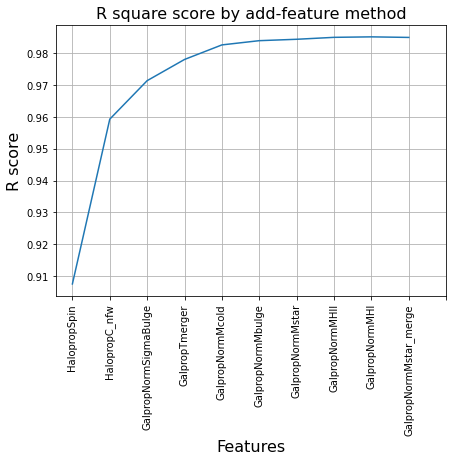

Elapsed time to run RF func on Group 14: 10302.270 seconds


In [8]:
# this code takes 10302.270 seconds ~ 3hrs to run when the dataset is Groups 1-4 galaxies with 40,000 entries
# (out of a total 158,501) and 10 most important features
start_time = time.time()

RF_results_14 = functions.target_predicting_RF_function(X=X_14_sample, y=y_14_sample)

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func on Group 14: {elapsed_time:.3f} seconds")

##### RF best parameters for Disk Galaxies (Groups 1-4), Galaxies with $\frac{M_{bulge}}{M_{star}}$<=0.4:

    Best params, best score: 0.9843 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
    RF Accuracy: 0.98 (+/- 0.00)


#### The most important features for Disk Galaxies (Groups 1-4) galaxies are: 

	 1 HalopropSpin 0.907514213325463
	 2 HalopropC_nfw 0.9593035416599681
	 3 GalpropNormSigmaBulge 0.9714015313937755
	 4 GalpropTmerger 0.9780648753830881
	 5 GalpropNormMcold 0.982638230039134
	 6 GalpropNormMbulge 0.9839699069005933
	 7 GalpropNormMstar 0.9844076824112746
	 8 GalpropNormMHII 0.9850168321831245
	 9 GalpropNormMHI 0.985168946491418
	 10 GalpropNormMstar_merge 0.9849910915764676

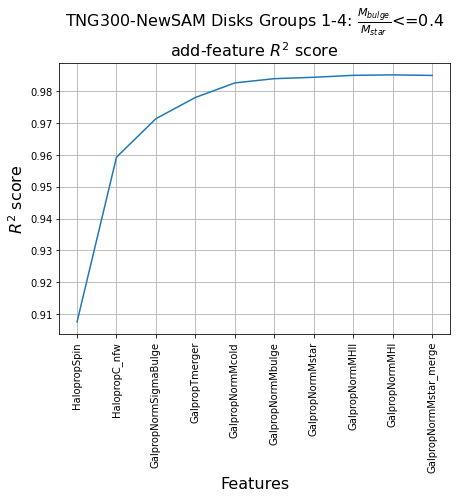

In [12]:
group14_fig_add_feature=RF_results_14[4].plot(x='features', y='r_sq_score', rot=90, figsize=(7,5), use_index=True,
                    legend=False, grid=True, 
                    xticks=range(0,10))
group14_fig_add_feature.set_title(label= r'TNG300-NewSAM Disks Groups 1-4: $\frac{M_{bulge}}{M_{star}}$<=0.4' + '\n' + r'add-feature $R^{2}$ score',fontsize=16)
group14_fig_add_feature.set_xlabel('Features',fontsize=16)
group14_fig_add_feature.set_ylabel(r'$R^{2}$ score',fontsize=16)

# group14_fig_add_feature.get_figure().savefig('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_TNG300_Group_14_R_score_by_add_feature_method.jpg', dpi=500)

plt.show()

In [13]:
# RF_results_14[4].to_csv('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_TNG300_Group_14_Max_r_scores_by_add_column_method.csv', index=False)

group14 = pd.read_csv('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_TNG300_Group_14_Max_r_scores_by_add_column_method.csv')

group14_fig = RF_results_14[1]
# group14_fig.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_TNG300_Group_14_RF_Prediction_vs_True.jpeg', dpi=500)
plt.show()

group14_fig_builtin_imp = RF_results_14[2]
# group14_fig_builtin_imp.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_TNG300_Group_14_Built_in_Feature_Ranking.jpeg', dpi=500)
plt.show()

In [14]:
# y_pred_RF_df_14 = RF_results_14[0]
# y_pred_RF_df_14 = pd.DataFrame({'y_pred_RF Group 14': y_pred_RF_df_14})

# y_pred_RF_df_14.to_csv('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_TNG300-NewSAM_Group_14_y_pred_RF_predicted_sizes.csv', index=False)

y_pred_RF_14 = pd.read_csv('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_TNG300-NewSAM_Group_14_y_pred_RF_predicted_sizes.csv')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params, best score: 0.9840 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}
RF Accuracy: 0.98 (+/- 0.00)


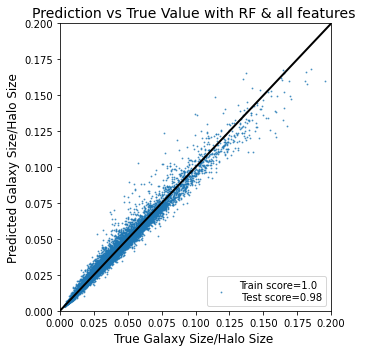

Elapsed time to compute the importances: 0.057 seconds
Elapsed time to compute the importances: 49.225 seconds


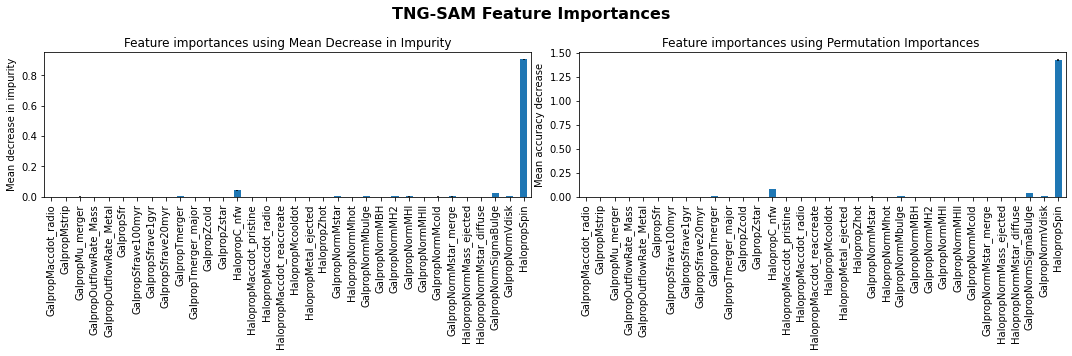

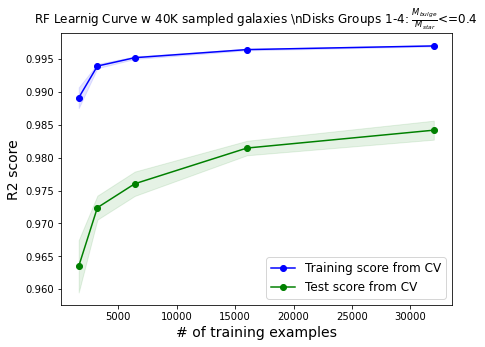

Elapsed time to run RF func and Learning Curves on Group 14 (B/M<=0.4): 1327.552 seconds


In [29]:
# this code takes 1327.552 seconds ~ 22min to run when the dataset is Groups 1-4 galaxies with 40,000 entries
start_time = time.time()

RF_lc_14 = tp_lc_functions.target_predicting_RF_function(X_14_sample, y_14_sample, r'RF Learnig Curve w 40K sampled galaxies \n' + r'Disks Groups 1-4: $\frac{M_{bulge}}{M_{star}}$<=0.4')

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func and Learning Curves on Group 14 (B/M<=0.4): {elapsed_time:.3f} seconds")

In [30]:
lc_14 = RF_lc_14[4]
# lc_14.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_TNG300_Group_14_RF_Learning_Curve.jpeg', dpi=500)

### <font color='purple'> <a id =3> </a> <br> Groups 1-4: SR equation search

#### <font color='blue'> Run the Symbolic Regression algorithm to search for the best physical model/equation in terminal or VisualStudio, running the file SR_TNG300-NewSAM_eqn_search_Groups14_disk_galaxies_v1.py

    Note: The SR algorithm does not run in Jupyter Notebook.

    
#### The pipeline for SR:
1. Randomly choose 10,000 (out of 158,000) disk galaxies in Groups 1-4 to feed the SR search. This is because SR can use max ~10,000 entries to search for an equation. The morphology distribution of the 10K subset should be similar to the morphology distribution of the complete dataset.
2. Use only the most important features from the step above to feed the SR. This is because SR cannot handle a large amount of features and it does apply the built-in RF feature ranking before searching for an equation.
3. Run the SR equation search using the allowed mathematical operations for the task at hand.

The features used for eqn search are the first most important features + the $M_{disk}/M_{star}$ ratio, ['HalopropSpin', 'HalopropC_nfw','GalpropNormSigmaBulge', 'GalpropTmerger','DiskMstar_ratio']. We provide the SR with the $M_{disk}/M_{star}$ because we know that the morphologies in groups 1-4 change by this ratio.
 
The best equation with n_iterations 1,000 and 10,000 is: Abs(HalopropSpin)**1.148
 
R2 score=0.90
 
lapsed time to compute the All Disk Morphologies SR equation with n_iterations=10,000 is: 21994.181seconds ~ 6 hrs
    


In [101]:
# choose a subsample of 10K galaxies to use for eqn search with SR
df_14_sample2 = df_14.sample(n = 10000, random_state = 2023)

# Save this subsample of 10K galaxies
# df_14_sample2.to_csv('TNG300-SAM_images/v6_TNG300-SAM_Morphologies_definition/df_14_Normalized_as_defined_in_TNG300notebook_v6_10Ksubsample_seed2023', index=False)


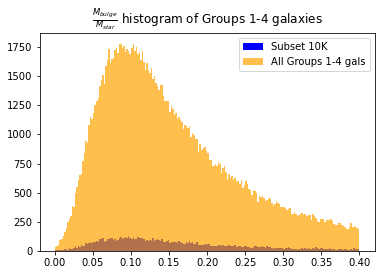

In [31]:
plt.hist(df_14_sample2.BulgeMstar_ratio, color='blue', label='Subset 10K', range=(0.0,0.4), bins=200)
plt.hist(df_14.BulgeMstar_ratio,  color='orange', 
         label='All Groups 1-4 gals', alpha=0.7, range=(0.0,0.4), bins=200)
plt.title(r'$\frac{M_{bulge}}{M_{star}}$ histogram of Groups 1-4 galaxies')
plt.legend()
# plt.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_df_14_BulgeMstar_ratio_histogram_all_vs_40kdataset.jpeg', dpi=500)
plt.show()

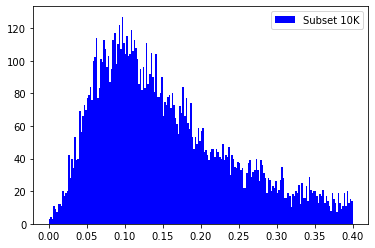

In [32]:
plt.hist(df_14_sample2.BulgeMstar_ratio, color='blue', label='Subset 10K', range=(0.0,0.4), bins=200)
plt.legend()
plt.show()

In [33]:
SR_eqns_n_iter1K = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG300-SAM_images/SR_df_14_run1_disks_eqn_search/hall_of_fame_2023-04-13_122651.545.csv', sep='|')

In [37]:
SR_eqns_n_iter1K

,Complexity,MSE,Equation
0,1,0.000303,HalopropSpin
1,3,0.000032,"pow(HalopropSpin, 1.1480097)"
2,5,0.000018,"(HalopropSpin / pow(1.0352505, HalopropC_nfw))"
3,7,0.000017,"(HalopropSpin * (pow(0.95757914, HalopropC_nfw..."
4,9,0.000012,(HalopropSpin * (pow(1.6021732 / HalopropC_nfw...
5,11,0.000009,(HalopropSpin * ((pow(2.0141404 / HalopropC_nf...
6,13,0.000008,(HalopropSpin * ((0.37850326 / GalpropNormSigm...
7,14,0.000008,(HalopropSpin * ((0.37850326 / GalpropNormSigm...
8,15,0.000008,(HalopropSpin * ((0.37850326 / GalpropNormSigm...
9,16,0.000007,(HalopropSpin * ((0.37850326 / GalpropNormSigm...


In [39]:
# for i in range(SR_eqns_n_iter1K.shape[0]):
for i in range(10):
    
    print (SR_eqns_n_iter1K.loc[i, 'Equation'])

HalopropSpin
pow(HalopropSpin, 1.1480097)
(HalopropSpin / pow(1.0352505, HalopropC_nfw))
(HalopropSpin * (pow(0.95757914, HalopropC_nfw) + HalopropSpin))
(HalopropSpin * (pow(1.6021732 / HalopropC_nfw, GalpropNormSigmaBulge) + 0.42571864))
(HalopropSpin * ((pow(2.0141404 / HalopropC_nfw, GalpropNormSigmaBulge) * DiskMstar_ratio) + 0.43726555))
(HalopropSpin * ((0.37850326 / GalpropNormSigmaBulge) + ((GalpropNormSigmaBulge / (1.2730889 - DiskMstar_ratio)) / HalopropC_nfw)))
(HalopropSpin * ((0.37850326 / GalpropNormSigmaBulge) + (((GalpropNormSigmaBulge / 0.31956413) * square(DiskMstar_ratio)) / HalopropC_nfw)))
(HalopropSpin * ((0.37850326 / GalpropNormSigmaBulge) + ((pow(GalpropNormSigmaBulge / 0.32581887, DiskMstar_ratio) * DiskMstar_ratio) / HalopropC_nfw)))
(HalopropSpin * ((0.37850326 / GalpropNormSigmaBulge) + ((((GalpropNormSigmaBulge + HalopropSpin) / 0.33989766) * square(DiskMstar_ratio)) / HalopropC_nfw)))


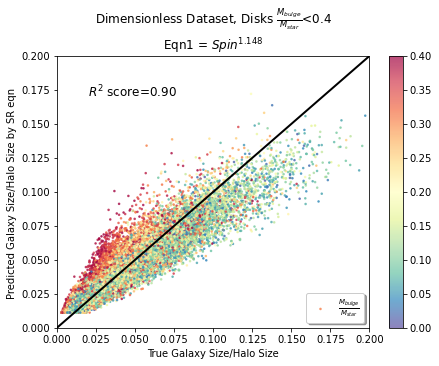

In [49]:
# 'best' eqn by SR pow(HalopropSpin, 1.1480097)

sr_disks_v1_eqn1 = df_14.loc[:, 'HalopropSpin']**1.148

r2_score_disks_1=r2_score(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_eqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_eqn1,
            c = df_14.loc[:, 'GalpropNormMbulge']/df_14.loc[:,'GalpropNormMstar'], 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$\frac{M_{bulge}}{M_{star}}$', vmin=0.0, vmax=0.4)
ax.text(0.02, 0.17, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_disks_1), size=12)
ax.axis([0.0,0.2, 0.0,0.2])
ax.plot([0.0, 0.3], [0.0, 0.3], color = 'black', linewidth = 2)
ax.set_title(r'Dimensionless Dataset, Disks $\frac{M_{bulge}}{M_{star}}$<0.4' + '\n'+ r'Eqn1 = $Spin^{1.148}$')
ax.set_xlabel('True Galaxy Size/Halo Size')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Galaxy Size/Halo Size by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_Group14_SR_besteqn_disks_dimensionless.jpeg', dpi=500)
plt.show()

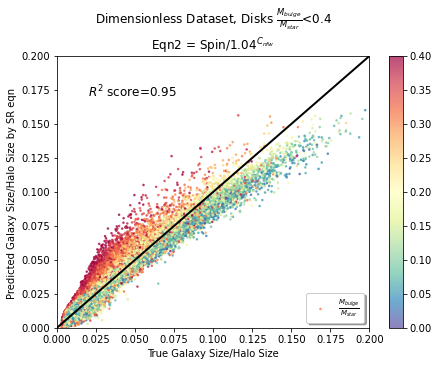

In [50]:
# second eqn by SR (HalopropSpin / pow(1.0352505, HalopropC_nfw))

sr_disks_v1_eqn2 = df_14.loc[:, 'HalopropSpin']/1.035**df_14.loc[:, 'HalopropC_nfw']

r2_score_disks_2=r2_score(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_eqn2)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_eqn2,
            c = df_14.loc[:, 'GalpropNormMbulge']/df_14.loc[:,'GalpropNormMstar'], 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$\frac{M_{bulge}}{M_{star}}$', vmin=0.0, vmax=0.4)
ax.text(0.02, 0.17, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_disks_2), size=12)
ax.axis([0.0,0.2, 0.0,0.2])
ax.plot([0.0, 0.3], [0.0, 0.3], color = 'black', linewidth = 2)
ax.set_title(r'Dimensionless Dataset, Disks $\frac{M_{bulge}}{M_{star}}$<0.4' + '\n'+ r'Eqn2 = Spin/$1.04^{C_{nfw}}$')
ax.set_xlabel('True Galaxy Size/Halo Size')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Galaxy Size/Halo Size by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_Group14_SR_2ndeqn_disks_dimensionless.jpeg', dpi=500)
plt.show()

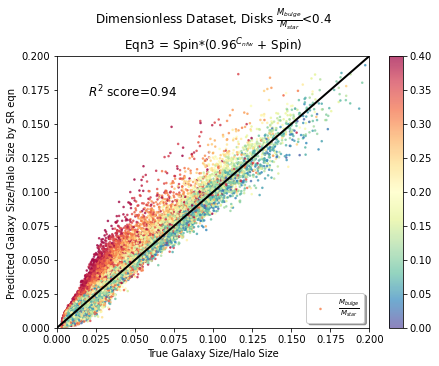

In [51]:
# 3rd eqn by SR (HalopropSpin * (pow(0.95757914, HalopropC_nfw) + HalopropSpin))

sr_disks_v1_eqn3 = df_14.loc[:, 'HalopropSpin']* (0.96**df_14.loc[:, 'HalopropC_nfw'] \
                  + df_14.loc[:, 'HalopropSpin'])

r2_score_disks_3=r2_score(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_eqn3)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_eqn3,
            c = df_14.loc[:, 'GalpropNormMbulge']/df_14.loc[:,'GalpropNormMstar'], 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$\frac{M_{bulge}}{M_{star}}$', vmin=0.0, vmax=0.4)
ax.text(0.02, 0.17, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_disks_3), size=12)
ax.axis([0.0,0.2, 0.0,0.2])
ax.plot([0.0, 0.3], [0.0, 0.3], color = 'black', linewidth = 2)
ax.set_title(r'Dimensionless Dataset, Disks $\frac{M_{bulge}}{M_{star}}$<0.4' + '\n'+ r'Eqn3 = Spin*($0.96^{C_{nfw}}$ + Spin)')
ax.set_xlabel('True Galaxy Size/Halo Size')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Galaxy Size/Halo Size by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_Group14_SR_3rdeqn_disks_dimensionless.jpeg', dpi=500)
plt.show()

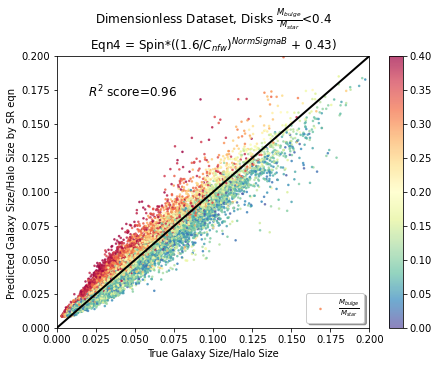

In [53]:
# 4th eqn by SR (HalopropSpin * (pow(1.6021732 / HalopropC_nfw, GalpropNormSigmaBulge) + 0.42571864))

sr_disks_v1_eqn4 = df_14.loc[:, 'HalopropSpin']* ((1.6/df_14.loc[:, 'HalopropC_nfw'])**df_14.loc[:, 'GalpropNormSigmaBulge'] \
                  + 0.43)

r2_score_disks_4=r2_score(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_eqn4)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_eqn4,
            c = df_14.loc[:, 'GalpropNormMbulge']/df_14.loc[:,'GalpropNormMstar'], 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$\frac{M_{bulge}}{M_{star}}$', vmin=0.0, vmax=0.4)
ax.text(0.02, 0.17, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_disks_4), size=12)
ax.axis([0.0,0.2, 0.0,0.2])
ax.plot([0.0, 0.3], [0.0, 0.3], color = 'black', linewidth = 2)
ax.set_title(r'Dimensionless Dataset, Disks $\frac{M_{bulge}}{M_{star}}$<0.4' + '\n'+ r'Eqn4 = Spin*($(1.6/C_{nfw})^{NormSigmaB}$ + 0.43)')
ax.set_xlabel('True Galaxy Size/Halo Size')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Galaxy Size/Halo Size by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_Group14_SR_4theqn_disks_dimensionless.jpeg', dpi=500)
plt.show()

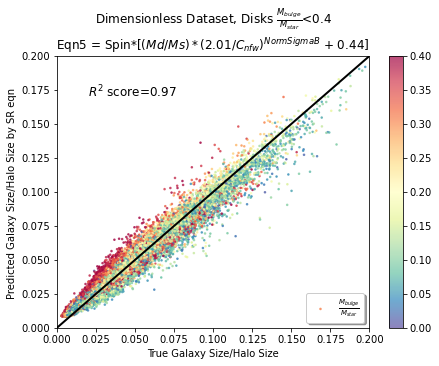

In [59]:
# 5th eqn by SR HalopropSpin * {(pow(2.0141404 / HalopropC_nfw, GalpropNormSigmaBulge) * DiskMstar_ratio) + 0.43726555}

sr_disks_v1_eqn5 = df_14.loc[:, 'HalopropSpin']* \
                        ((df_14.loc[:, 'DiskMstar_ratio'])*(2.01/df_14.loc[:, 'HalopropC_nfw'])**df_14.loc[:, 'GalpropNormSigmaBulge'] \
                  + 0.44)

r2_score_disks_5=r2_score(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_eqn5)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_eqn5,
            c = df_14.loc[:, 'GalpropNormMbulge']/df_14.loc[:,'GalpropNormMstar'], 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$\frac{M_{bulge}}{M_{star}}$', vmin=0.0, vmax=0.4)
ax.text(0.02, 0.17, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_disks_5), size=12)
ax.axis([0.0,0.2, 0.0,0.2])
ax.plot([0.0, 0.3], [0.0, 0.3], color = 'black', linewidth = 2)
ax.set_title(r'Dimensionless Dataset, Disks $\frac{M_{bulge}}{M_{star}}$<0.4' + '\n'+ r'Eqn5 = Spin*[$(Md/Ms)*(2.01/C_{nfw})^{NormSigmaB}$ + 0.44]')
ax.set_xlabel('True Galaxy Size/Halo Size')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Galaxy Size/Halo Size by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_Group14_SR_5theqn_disks_dimensionless.jpeg', dpi=500)
plt.show()

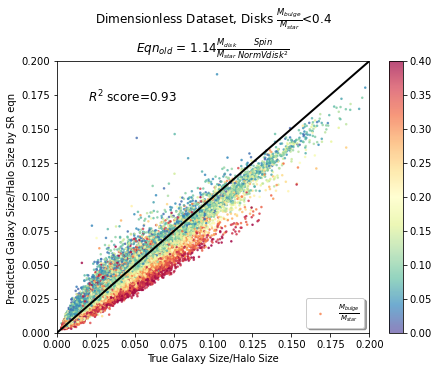

In [100]:
# Best eqn by SR from previous TNG100-SAM (old SAM) DiskMstar_ratio * HalopropSpin/NormVdisk^2

# An eqn with R2=0.95 found by experimenting
# sr_disks_v1_eqnVdisk = (df_14.loc[:, 'DiskMstar_ratio']**0.15) * df_14.loc[:, 'HalopropSpin']/(df_14.loc[:, 'GalpropNormVdisk']**2)
sr_disks_v1_eqnVdisk = 1.14*df_14.loc[:, 'DiskMstar_ratio'] * df_14.loc[:, 'HalopropSpin']/(df_14.loc[:, 'GalpropNormVdisk']**2)

r2_score_disks_Vdisk=r2_score(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_eqnVdisk)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_eqnVdisk,
            c = df_14.loc[:, 'GalpropNormMbulge']/df_14.loc[:,'GalpropNormMstar'], 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$\frac{M_{bulge}}{M_{star}}$', vmin=0.0, vmax=0.4)
ax.text(0.02, 0.17, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_disks_Vdisk), size=12)
ax.axis([0.0,0.2, 0.0,0.2])
ax.plot([0.0, 0.3], [0.0, 0.3], color = 'black', linewidth = 2)
ax.set_title(r'Dimensionless Dataset, Disks $\frac{M_{bulge}}{M_{star}}$<0.4' + '\n'+ r'$Eqn_{old}$ = 1.14$\frac{M_{disk}}{M_{star}}$$\frac{Spin}{NormVdisk^{2}}$')
ax.set_xlabel('True Galaxy Size/Halo Size')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Galaxy Size/Halo Size by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_Group14_SR_OLDeqn_disks_dimensionless.jpeg', dpi=500)
plt.show()

In [67]:
SR_eqns_wVdisk_n_iter1K = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG300-SAM_images/SR_df_14_run3_disks_eqn_search/hall_of_fame_2023-04-14_161439.985.csv', sep='|')

In [69]:
for i in range(10):
    
    print(SR_eqns_wVdisk_n_iter1K.loc[i, 'Equation'])

HalopropSpin
pow(HalopropSpin, 1.1480181)
(HalopropSpin / square(GalpropNormVdisk))
((HalopropSpin / GalpropNormVdisk) + -0.0074222)
((HalopropSpin - 0.005295929) / pow(GalpropNormVdisk, 1.4763314))
((HalopropSpin * 1.5128043) / (square(GalpropNormVdisk) + GalpropNormSigmaBulge))
(pow(HalopropSpin / GalpropNormVdisk, 1.0999846) * pow(GalpropNormSigmaBulge, -0.34715313))
((HalopropSpin * pow(1.6496137, DiskMstar_ratio)) / (square(GalpropNormVdisk) + GalpropNormSigmaBulge))
(pow(HalopropSpin / GalpropNormVdisk, 1.0802343) * pow(DiskMstar_ratio / GalpropNormSigmaBulge, 0.3771752))
(pow(HalopropSpin / GalpropNormVdisk, 1.0999846) * (DiskMstar_ratio + (pow(-0.13360031, GalpropNormSigmaBulge) / DiskMstar_ratio)))


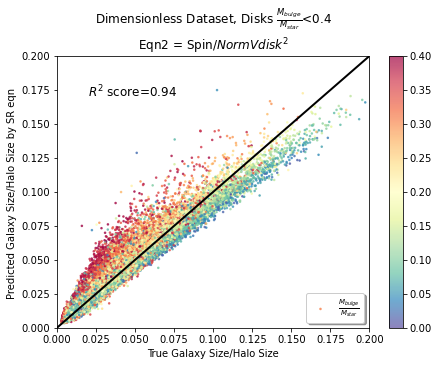

In [71]:
# second eqn by SR when replacing C_nfw with NormVdisk is (HalopropSpin / square(GalpropNormVdisk))

sr_disks_v1_eqn2Vdisk = df_14.loc[:, 'HalopropSpin']/df_14.loc[:, 'GalpropNormVdisk']**2

r2_score_disks_2Vdisk=r2_score(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_eqn2Vdisk)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_eqn2Vdisk,
            c = df_14.loc[:, 'GalpropNormMbulge']/df_14.loc[:,'GalpropNormMstar'], 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$\frac{M_{bulge}}{M_{star}}$', vmin=0.0, vmax=0.4)
ax.text(0.02, 0.17, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_disks_2Vdisk), size=12)
ax.axis([0.0,0.2, 0.0,0.2])
ax.plot([0.0, 0.3], [0.0, 0.3], color = 'black', linewidth = 2)
ax.set_title(r'Dimensionless Dataset, Disks $\frac{M_{bulge}}{M_{star}}$<0.4' + '\n'+ r'Eqn2 = Spin/$NormVdisk^{2}$')
ax.set_xlabel('True Galaxy Size/Halo Size')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Galaxy Size/Halo Size by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_Group14_SR_2ndeqn_wVdisk_disks_dimensionless.jpeg', dpi=500)
plt.show()

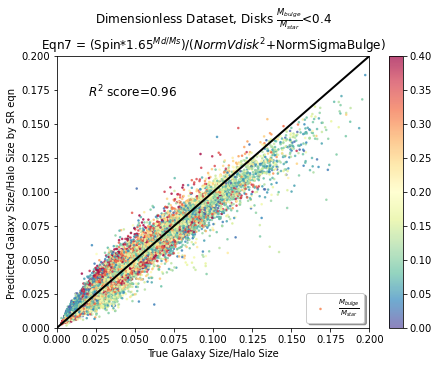

In [77]:
# 7th eqn by SR when replacing C_nfw with NormVdisk is: 
# ((HalopropSpin * pow(1.6496137, DiskMstar_ratio)) / (square(GalpropNormVdisk) + GalpropNormSigmaBulge))


sr_disks_v1_eqn7Vdisk = (df_14.loc[:, 'HalopropSpin']* 1.65**df_14.loc[:, 'DiskMstar_ratio'])/(df_14.loc[:, 'GalpropNormVdisk']**2 + df_14.loc[:, 'GalpropNormSigmaBulge'])

r2_score_disks_7Vdisk=r2_score(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_eqn7Vdisk)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_eqn7Vdisk,
            c = df_14.loc[:, 'GalpropNormMbulge']/df_14.loc[:,'GalpropNormMstar'], 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$\frac{M_{bulge}}{M_{star}}$', vmin=0.0, vmax=0.4)
ax.text(0.02, 0.17, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_disks_7Vdisk), size=12)
ax.axis([0.0,0.2, 0.0,0.2])
ax.plot([0.0, 0.3], [0.0, 0.3], color = 'black', linewidth = 2)
ax.set_title(r'Dimensionless Dataset, Disks $\frac{M_{bulge}}{M_{star}}$<0.4' + '\n'+ r'Eqn7 = (Spin*$1.65^{Md/Ms}$)/($NormVdisk^{2}$+NormSigmaBulge)')
ax.set_xlabel('True Galaxy Size/Halo Size')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Galaxy Size/Halo Size by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_Group14_SR_7theqn_wVdisk_disks_dimensionless.jpeg', dpi=500)
plt.show()

Run SR using only 3 features: Spin, NormVdisk and Md/Mstar ratio.

In [102]:
SR_eqns_3feat_n_iter1K = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG300-SAM_images/SR_df_14_run4_disks_eqn_search/hall_of_fame_2023-04-17_134602.185.csv', sep='|')

In [103]:
for i in range(10):
    
    print(SR_eqns_3feat_n_iter1K.loc[i, 'Equation'])

HalopropSpin
pow(HalopropSpin, 1.1480182)
(HalopropSpin / square(GalpropNormVdisk))
((HalopropSpin / GalpropNormVdisk) - 0.0074222)
((HalopropSpin - 0.005870935) / pow(GalpropNormVdisk, 1.4620011))
(((HalopropSpin * pow(DiskMstar_ratio, 0.33843315)) / GalpropNormVdisk) + -0.005295596)
(((HalopropSpin - 0.0053429184) * pow(DiskMstar_ratio, 0.28800714)) / pow(GalpropNormVdisk, GalpropNormVdisk))
((HalopropSpin * (pow(DiskMstar_ratio, 0.28564823) / pow(square(GalpropNormVdisk), 0.6074754))) - 0.0041696667)
(((HalopropSpin - ((0.014475579 - HalopropSpin) * DiskMstar_ratio)) * 0.55226886) / pow(GalpropNormVdisk, 1.4282172))
(((HalopropSpin - ((0.014475579 - HalopropSpin) * DiskMstar_ratio)) * 0.55226886) / square(pow(GalpropNormVdisk, 0.715311)))


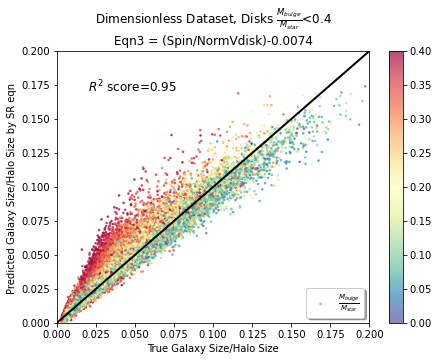

In [113]:
# 3rd eqn by SR when using 3 features only: 
# ((HalopropSpin / GalpropNormVdisk) - 0.0074222)

sr_disks_v1_3feateqn1 = (df_14.loc[:, 'HalopropSpin']/df_14.loc[:, 'GalpropNormVdisk']) - 0.0074

r2_score_disks_3feat_1=r2_score(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_3feateqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_3feateqn1,
            c = df_14.loc[:, 'GalpropNormMbulge']/df_14.loc[:,'GalpropNormMstar'], 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$\frac{M_{bulge}}{M_{star}}$', vmin=0.0, vmax=0.4)
ax.text(0.02, 0.17, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_disks_3feat_1), size=12)
ax.axis([0.0,0.2, 0.0,0.2])
ax.plot([0.0, 0.3], [0.0, 0.3], color = 'black', linewidth = 2)
ax.set_title(r'Dimensionless Dataset, Disks $\frac{M_{bulge}}{M_{star}}$<0.4' + '\n'+ r'Eqn3 = (Spin/NormVdisk)-0.0074')
ax.set_xlabel('True Galaxy Size/Halo Size')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Galaxy Size/Halo Size by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_Group14_SR_3rdeqn_3feat_disks_dimensionless.jpeg', dpi=500)
plt.show()

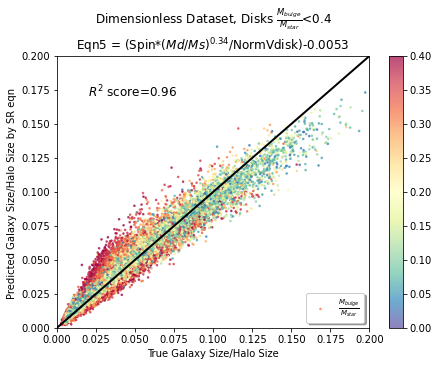

In [112]:
# 5th eqn by SR when using 3 features only: 
# (((HalopropSpin * pow(DiskMstar_ratio, 0.33843315)) / GalpropNormVdisk) + -0.005295596)

sr_disks_v1_3feateqn5 = (df_14.loc[:, 'HalopropSpin']* (df_14.loc[:,'DiskMstar_ratio']**0.34)/df_14.loc[:, 'GalpropNormVdisk']) - 0.0053

r2_score_disks_3feat_5=r2_score(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_3feateqn5)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_3feateqn5,
            c = df_14.loc[:, 'GalpropNormMbulge']/df_14.loc[:,'GalpropNormMstar'], 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$\frac{M_{bulge}}{M_{star}}$', vmin=0.0, vmax=0.4)
ax.text(0.02, 0.17, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_disks_3feat_5), size=12)
ax.axis([0.0,0.2, 0.0,0.2])
ax.plot([0.0, 0.3], [0.0, 0.3], color = 'black', linewidth = 2)
ax.set_title(r'Dimensionless Dataset, Disks $\frac{M_{bulge}}{M_{star}}$<0.4' + '\n'+ r'Eqn5 = (Spin*$(Md/Ms)^{0.34}$/NormVdisk)-0.0053')
ax.set_xlabel('True Galaxy Size/Halo Size')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Galaxy Size/Halo Size by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_Group14_SR_5theqn_3feat_disks_dimensionless.jpeg', dpi=500)
plt.show()

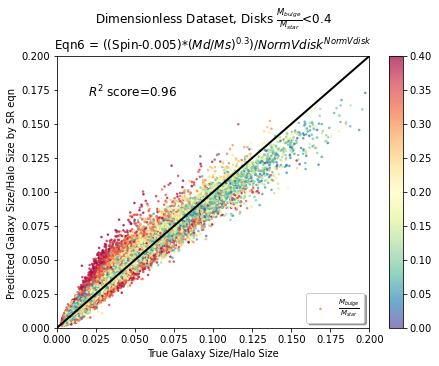

In [117]:
# 6th eqn by SR when using 3 features only:
#(((HalopropSpin - 0.0053429184) * pow(DiskMstar_ratio, 0.28800714)) / pow(GalpropNormVdisk, GalpropNormVdisk))

sr_disks_v1_3feateqn6 = ((df_14.loc[:, 'HalopropSpin']-0.005)* (df_14.loc[:,'DiskMstar_ratio']**0.3))/(df_14.loc[:, 'GalpropNormVdisk']**df_14.loc[:, 'GalpropNormVdisk'])

r2_score_disks_3feat_6=r2_score(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_3feateqn6)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_14.loc[:, 'GalpropNormHalfRadius'], sr_disks_v1_3feateqn6,
            c = df_14.loc[:, 'GalpropNormMbulge']/df_14.loc[:,'GalpropNormMstar'], 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$\frac{M_{bulge}}{M_{star}}$', vmin=0.0, vmax=0.4)
ax.text(0.02, 0.17, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_disks_3feat_6), size=12)
ax.axis([0.0,0.2, 0.0,0.2])
ax.plot([0.0, 0.3], [0.0, 0.3], color = 'black', linewidth = 2)
ax.set_title(r'Dimensionless Dataset, Disks $\frac{M_{bulge}}{M_{star}}$<0.4' + '\n'+ r'Eqn6 = ((Spin-0.005)*$(Md/Ms)^{0.3}$)/$NormVdisk^{NormVdisk}$')
ax.set_xlabel('True Galaxy Size/Halo Size')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Galaxy Size/Halo Size by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_Group14_SR_5theqn_3feat_disks_dimensionless.jpeg', dpi=500)
plt.show()

In [137]:
SR_eqns_3feat_n_iter5K = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG300-SAM_images/SR_df_14_run5_disks_eqn_search/hall_of_fame_2023-04-17_150919.745.csv', sep='|')

In [138]:
for i in range(10):
    
    print(SR_eqns_3feat_n_iter5K.loc[i, 'Equation'])

HalopropSpin
pow(HalopropSpin, 1.1480181)
(HalopropSpin / square(GalpropNormVdisk))
((HalopropSpin / GalpropNormVdisk) - 0.0074222)
((HalopropSpin + -0.005869947) / pow(GalpropNormVdisk, 1.4717424))
((HalopropSpin + -0.005869947) / square(pow(GalpropNormVdisk, 0.73103094)))
(((HalopropSpin * pow(DiskMstar_ratio, 0.32965043)) / GalpropNormVdisk) - 0.0053946553)
(((HalopropSpin / (GalpropNormVdisk - 0.036195505)) * pow(DiskMstar_ratio, 0.40910622)) - 0.005822275)
(((HalopropSpin - 0.006273221) / (square(GalpropNormVdisk) + GalpropNormVdisk)) * (DiskMstar_ratio + 1.2171519))
(((HalopropSpin - 0.006273221) / (square(GalpropNormVdisk) + GalpropNormVdisk)) * pow(DiskMstar_ratio + 1.1599313, 1.0399541))


### Curve_fit optimization for a*$\frac{M_{disk}}{M_{star}}^{b}$ * $\frac{Spin}{NormV_{disk}^{2}}$

In [118]:
def mdiskmstar_spin_vdisk2_func(spin_vdisk_diskmstar, a, b):
    # spin_vdisk is a 2,M array that contains HalopropSpin and GalpropNormVdisk
    # spin is spin_vdisk_diskmstar[0]
    # NormVdisk is spin_vdisk_diskmstar[1]
    # Mdisk/Mstar is spin_vdisk_diskmstar[2]
    
    spin_use = np.copy(spin_vdisk_diskmstar[0])
    vdisk = np.copy(spin_vdisk_diskmstar[1])
    diskmstar = np.copy (spin_vdisk_diskmstar[2])
#     spin_use[spin_use < spin_min] = spin_min # no need for spin_use in TNG300 dataset since I introduced
# spin_effective in Notebook v6, where spin=0.02 for all spin<0.02.
    
    size = a*spin_use*(diskmstar)**b/vdisk**2 

    return size

In [132]:
def disks_physical_formula_func_v1 (df, group):
    
    """ This function takes a df as an input, then: a) extracts the size, spin and vdisk columns from the df, 
    b) forms a 2,M array with the spin & vdisk columns (called spin_vdisk)
    c) uses curve_fit to find the optimal parameters of spin_vdisk2_func (whose input is spin_vdisk and true size of the galaxies from the df)
    d) calculates the R2 score of true size vs predicted size by the spin_vdisk2_func on the complete dataset, df
    e) calculates the R2 score of true size vs predicted size by the spin_vdisk2_func on on the galaxies with low spin (spin<0.021)
    f) Plots the figure of the true size vs predicted size for each group of galaxy morphology (noted in the title)
    
    It returns: the spin_vdisk 2,M array, the optimal parameters and pcov from curve_fit, the size array obtained
    by applying spin_vdisk2_func on spin_vdisk with parameters obtained from curve_fit, and the
    figure comparing true size vs predicted size
    
    Note: the group input has to be in a string format"""
    
#   a)
    Size_true = np.array(df.loc[:, 'GalpropNormHalfRadius'])
    HalopropSpin = np.array(df.loc[:, 'HalopropSpin'])
    GalpropNormVdisk = np.array(df.loc[:, 'GalpropNormVdisk'])

    #   b) 
    spin_vdisk = [HalopropSpin, GalpropNormVdisk]
    spin_vdisk = np.array (spin_vdisk) # convert list into array
    
    BulgeMstar = np.array (df.loc[:, 'BulgeMstar_ratio'])
    
    Mdisk = np.array (df.loc[:, 'GalpropNormMdisk'])
    
    DiskMstar = np.array (df.loc[:, 'DiskMstar_ratio'])
    
    spin_vdisk_diskmstar = np. array([HalopropSpin, GalpropNormVdisk, DiskMstar])

#     spin_vdisk_bmstar = np. array([HalopropSpin, GalpropNormVdisk, BulgeMstar])

#   c)

    popt, pcov = curve_fit(mdiskmstar_spin_vdisk2_func, spin_vdisk_diskmstar, Size_true)
    
    size_func = mdiskmstar_spin_vdisk2_func(spin_vdisk_diskmstar, *popt)
#   d) R2 score of spin>0.02 galaxies
    r2_score_df = r2_score(Size_true, size_func)
    r2_score_df
#   e) R2 score of spin<0.02 galaxies
    df_spin_size = df.loc[:,['GalpropNormHalfRadius', 'HalopropSpin']]
    df_spin_size.loc[:, "Predicted"] = size_func
    zz = df_spin_size[df_spin_size.loc[:,'HalopropSpin']<=0.02]
    actual_size= zz['GalpropNormHalfRadius']
    predicted_size = zz['Predicted']
    r2_score_lowspin = r2_score(actual_size, predicted_size)

#   f) Plot the figure
    fig_prediction, ax = plt.subplots(figsize=(7, 5))
    
    ax = plt.subplot()
    im = ax.scatter(Size_true, size_func, marker='.', s=10, alpha=0.7, 
                c  = df.loc[:,'BulgeMstar_ratio'],  
                cmap='Spectral_r', vmin=0.0, vmax=0.4,
#                 label=' colorbar: Mdisk/Mstar ratio \n fit: a=%5.3f \n c=%5.3f' % tuple(popt))
                label=r'colorbar:$\frac{M_{bulge}}{M_{star}}$' +  '\n fit: a=%5.3f \n b=%5.3f' % tuple(popt))
    ax.axis([0.0,0.2, 0.0,0.2])
    ax.plot([0.0, 0.3], [0.0, 0.3], color = 'black', linewidth = 2)
    ax.text(0.02, 0.17, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_df), size=12)
    ax.text(0.02, 0.15, r'$R^{2}_{spin<0.02 gals}$=' + '{:.2f}'.format(r2_score(actual_size, predicted_size)), size=12)
    ax.set_title(r'Eqn= a*$(\frac{M_{disk}}{M_{star}})^{b}$*Spin/$NormVdisk^{2}$ ' + ' \n' + '{} '.format(group))
    ax.set_ylabel('Galaxy Size/Halo Size as predicted by size function')
    ax.set_xlabel('True Galaxy Size/Halo Size')
    ax.legend(loc = 'lower right', shadow=True)
    fig_prediction.colorbar(im, ax=ax)
    
    fig_prediction.tight_layout()
    # plt.savefig('BulgierDisks_TrueSize_vs_FunctionSize_15_wsmallgals.jpeg', dpi=500)
    plt.show()
    
    return spin_vdisk_diskmstar, popt, pcov, size_func, fig_prediction, r2_score_df, r2_score_lowspin

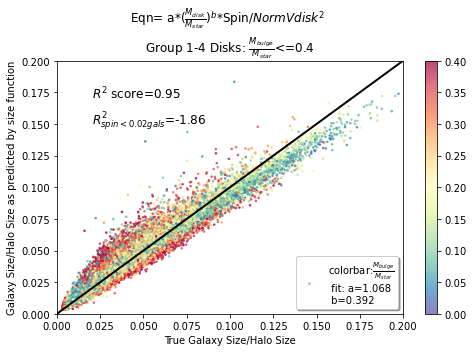

In [133]:
results_df_14 = disks_physical_formula_func_v1(df_14, group = r'Group 1-4 Disks: $\frac{M_{bulge}}{M_{star}}$<=0.4')
popt14 = results_df_14[1]

In [136]:
# results_df_14[4].savefig('TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_Group14_DiskMstarSpinVdisk2eqn_optimized.jpeg', dpi=500)

## <font color='purple'> <a id =4> </a> <br> Elliptical Galaxies, 0.4<$\frac{M_{bulge}}{M_{star}}$<0.8, Groups 5-8: RF, Feature Ranking and SR equation search by morphology

### <font color='purple'> <a id =5> </a> <br> Groups 5-8: RF and Feature Ranking 

In [15]:
import os
# os.mkdir('TNG300-SAM_images/v7_TNG300-SAM_df_58')

In [16]:
df_58 = pd.read_csv('TNG300-SAM_images/v6_TNG300-SAM_Morphologies_definition/df_58_Normalized_as_defined_in_TNG300notebook_v6')
df_58_raw = pd.read_csv('TNG300-SAM_images/v6_TNG300-SAM_Morphologies_definition/df_58_Raw_as_defined_in_TNG300notebook_v6')
print("df_58.shape", df_58.shape)
print("df_58_raw.shape", df_58_raw.shape)

df_58.shape (38926, 38)
df_58_raw.shape (38926, 59)


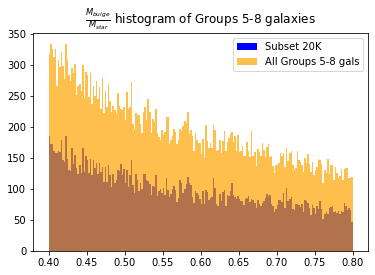

In [21]:
# choose a subsample of 40K galaxies since the original dataset is too large
df_58_sample = df_58.sample(n = 20000, random_state = 2023)

plt.hist(df_58_sample.BulgeMstar_ratio, color='blue', label='Subset 20K', range=(0.4,0.8), bins=200)
plt.hist(df_58.BulgeMstar_ratio,  color='orange', 
         label='All Groups 5-8 gals', alpha=0.7, range=(0.4,0.8), bins=200)
plt.title(r'$\frac{M_{bulge}}{M_{star}}$ histogram of Groups 5-8 galaxies')
plt.legend()
# plt.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_58/v7_df_58_BulgeMstar_ratio_histogram_all_vs_20kdataset.jpeg', dpi=500)
plt.show()

In [22]:
X_58_sample = df_58_sample.drop(columns=['GalpropNormHalfRadius', 'BulgeMstar_ratio',
                         'GalpropNormMdisk', 'DiskMstar_ratio'])
 

y_58_sample = df_58_sample.loc[:,'GalpropNormHalfRadius']

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params, best score: 0.8996 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
RF Accuracy: 0.90 (+/- 0.02)


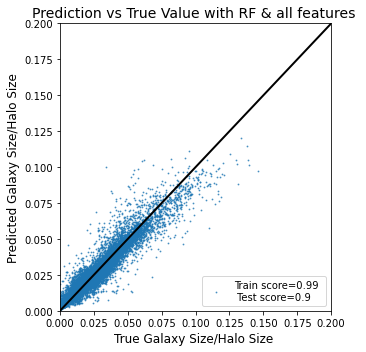

Elapsed time to compute the importances: 0.037 seconds
Elapsed time to compute the importances: 29.238 seconds


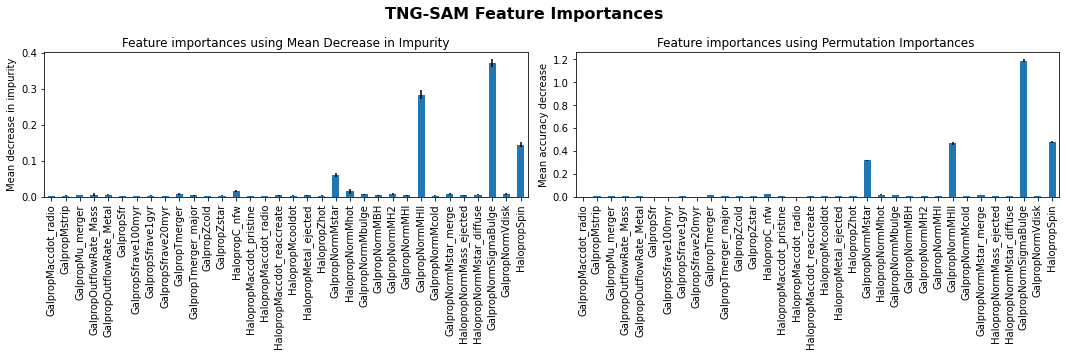

  0%|                                                    | 0/34 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▎                                          | 1/34 [00:03<01:43,  3.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▌                                         | 2/34 [00:06<01:46,  3.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|███▉                                        | 3/34 [00:10<01:48,  3.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▏                                      | 4/34 [00:13<01:41,  3.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▍                                     | 5/34 [00:17<01:42,  3.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|███████▊                                    | 6/34 [00:20<01:40,  3.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████                                   | 7/34 [00:24<01:38,  3.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▎                                 | 8/34 [00:28<01:37,  3.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▋                                | 9/34 [00:32<01:30,  3.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▋                              | 10/34 [00:34<01:19,  3.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|█████████████▉                             | 11/34 [00:36<01:08,  3.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▏                           | 12/34 [00:40<01:11,  3.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▍                          | 13/34 [00:44<01:09,  3.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▋                         | 14/34 [00:47<01:08,  3.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▉                        | 15/34 [00:49<00:55,  2.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████▏                      | 16/34 [00:52<00:49,  2.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 17/34 [00:55<00:51,  3.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▊                    | 18/34 [00:57<00:42,  2.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████                   | 19/34 [01:01<00:44,  2.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▎                 | 20/34 [01:04<00:44,  3.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▌                | 21/34 [01:08<00:43,  3.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▊               | 22/34 [01:11<00:39,  3.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████              | 23/34 [01:15<00:38,  3.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▎            | 24/34 [01:17<00:28,  2.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▌           | 25/34 [01:20<00:26,  2.99s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▉          | 26/34 [01:23<00:25,  3.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|██████████████████████████████████▏        | 27/34 [01:27<00:22,  3.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▍       | 28/34 [01:30<00:19,  3.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▋      | 29/34 [01:34<00:16,  3.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▉     | 30/34 [01:37<00:13,  3.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|███████████████████████████████████████▏   | 31/34 [01:41<00:10,  3.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▍  | 32/34 [01:44<00:06,  3.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▋ | 33/34 [01:48<00:03,  3.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 34/34 [01:51<00:00,  3.28s/it]


1. iteration: 
	 1 GalpropNormSigmaBulge 0.4050370019399696


  0%|                                                    | 0/33 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▎                                          | 1/33 [00:05<02:59,  5.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▋                                         | 2/33 [00:11<02:54,  5.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|████                                        | 3/33 [00:16<02:50,  5.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▎                                      | 4/33 [00:23<02:52,  5.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▋                                     | 5/33 [00:28<02:39,  5.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|████████                                    | 6/33 [00:34<02:34,  5.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████▎                                  | 7/33 [00:39<02:24,  5.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▋                                 | 8/33 [00:45<02:21,  5.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|████████████                                | 9/33 [00:51<02:16,  5.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████                              | 10/33 [00:56<02:06,  5.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▎                            | 11/33 [01:01<01:57,  5.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▋                           | 12/33 [01:07<01:55,  5.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▉                          | 13/33 [01:12<01:48,  5.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████▏                        | 14/33 [01:17<01:44,  5.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▌                       | 15/33 [01:21<01:30,  5.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 16/33 [01:27<01:28,  5.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 17/33 [01:33<01:25,  5.36s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▍                   | 18/33 [01:37<01:15,  5.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▊                  | 19/33 [01:43<01:13,  5.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████                 | 20/33 [01:48<01:09,  5.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▎               | 21/33 [01:54<01:05,  5.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 22/33 [02:00<01:00,  5.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|█████████████████████████████▉             | 23/33 [02:06<00:56,  5.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▎           | 24/33 [02:11<00:50,  5.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▌          | 25/33 [02:17<00:44,  5.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|█████████████████████████████████▉         | 26/33 [02:23<00:39,  5.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▏       | 27/33 [02:28<00:34,  5.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▍      | 28/33 [02:34<00:27,  5.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▊     | 29/33 [02:39<00:22,  5.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|███████████████████████████████████████    | 30/33 [02:45<00:17,  5.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▍  | 31/33 [02:51<00:11,  5.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▋ | 32/33 [02:57<00:05,  5.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 33/33 [03:02<00:00,  5.54s/it]


2. iteration: 
	 1 GalpropNormSigmaBulge 0.4050370019399696
	 2 GalpropNormMHII 0.6987150733973168


  0%|                                                    | 0/32 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/32 [00:08<04:35,  8.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▊                                         | 2/32 [00:17<04:29,  8.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|████▏                                       | 3/32 [00:27<04:21,  9.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▌                                      | 4/32 [00:36<04:12,  9.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|██████▉                                     | 5/32 [00:45<04:05,  9.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▎                                   | 6/32 [00:54<03:55,  9.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▋                                  | 7/32 [01:03<03:46,  9.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 8/32 [01:12<03:36,  9.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▍                               | 9/32 [01:21<03:27,  9.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▍                             | 10/32 [01:29<03:15,  8.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 34%|██████████████▊                            | 11/32 [01:38<03:02,  8.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▏                          | 12/32 [01:47<02:55,  8.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▍                         | 13/32 [01:56<02:47,  8.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▊                        | 14/32 [02:05<02:39,  8.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████▏                      | 15/32 [02:12<02:24,  8.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 16/32 [02:21<02:17,  8.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▊                    | 17/32 [02:30<02:10,  8.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████▏                  | 18/32 [02:37<01:56,  8.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▌                 | 19/32 [02:46<01:50,  8.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▉                | 20/32 [02:55<01:43,  8.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 66%|████████████████████████████▏              | 21/32 [03:04<01:35,  8.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▌             | 22/32 [03:13<01:26,  8.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|██████████████████████████████▉            | 23/32 [03:22<01:18,  8.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 24/32 [03:30<01:09,  8.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▌         | 25/32 [03:39<01:01,  8.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▉        | 26/32 [03:48<00:52,  8.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████▎      | 27/32 [03:57<00:44,  8.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▋     | 28/32 [04:06<00:35,  8.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|██████████████████████████████████████▉    | 29/32 [04:15<00:26,  8.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▎  | 30/32 [04:24<00:17,  8.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▋ | 31/32 [04:32<00:08,  8.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 32/32 [04:40<00:00,  8.77s/it]


3. iteration: 
	 1 GalpropNormSigmaBulge 0.4050370019399696
	 2 GalpropNormMHII 0.6987150733973168
	 3 GalpropNormMstar 0.7913317480916368


  0%|                                                    | 0/31 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/31 [00:11<05:35, 11.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▊                                         | 2/31 [00:22<05:24, 11.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▎                                       | 3/31 [00:33<05:15, 11.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▋                                      | 4/31 [00:46<05:16, 11.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|███████                                     | 5/31 [00:57<05:00, 11.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▌                                   | 6/31 [01:08<04:46, 11.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|█████████▉                                  | 7/31 [01:19<04:33, 11.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▎                                | 8/31 [01:31<04:20, 11.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▊                               | 9/31 [01:42<04:09, 11.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|█████████████▊                             | 10/31 [01:53<03:55, 11.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▎                           | 11/31 [02:04<03:40, 11.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▋                          | 12/31 [02:15<03:30, 11.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████                         | 13/31 [02:26<03:20, 11.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▍                       | 14/31 [02:37<03:10, 11.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 15/31 [02:47<02:54, 10.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 16/31 [02:59<02:44, 10.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▌                   | 17/31 [03:10<02:35, 11.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▉                  | 18/31 [03:20<02:19, 10.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████▎                | 19/31 [03:31<02:10, 10.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▋               | 20/31 [03:42<02:00, 10.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 21/31 [03:53<01:50, 11.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▌            | 22/31 [04:06<01:42, 11.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▉           | 23/31 [04:17<01:30, 11.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████▎         | 24/31 [04:28<01:18, 11.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▋        | 25/31 [04:40<01:09, 11.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████       | 26/31 [04:53<00:59, 11.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▍     | 27/31 [05:04<00:46, 11.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▊    | 28/31 [05:15<00:34, 11.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▏  | 29/31 [05:26<00:22, 11.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 30/31 [05:38<00:11, 11.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 31/31 [05:49<00:00, 11.26s/it]


4. iteration: 
	 1 GalpropNormSigmaBulge 0.4050370019399696
	 2 GalpropNormMHII 0.6987150733973168
	 3 GalpropNormMstar 0.7913317480916368
	 4 HalopropSpin 0.8557956879843682


  0%|                                                    | 0/30 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/30 [00:14<07:07, 14.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|██▉                                         | 2/30 [00:29<06:50, 14.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▍                                       | 3/30 [00:42<06:20, 14.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▊                                      | 4/30 [00:57<06:13, 14.36s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▎                                    | 5/30 [01:10<05:49, 14.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 6/30 [01:25<05:41, 14.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████▎                                 | 7/30 [01:40<05:29, 14.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▋                                | 8/30 [01:53<05:09, 14.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████▏                              | 9/30 [02:08<04:58, 14.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▎                            | 10/30 [02:22<04:45, 14.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|███████████████▊                           | 11/30 [02:35<04:22, 13.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▏                         | 12/30 [02:48<04:05, 13.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▋                        | 13/30 [03:03<03:57, 13.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████                       | 14/30 [03:18<03:46, 14.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 15/30 [03:30<03:23, 13.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▉                    | 16/30 [03:44<03:14, 13.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▎                  | 17/30 [03:59<03:03, 14.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 18/30 [04:11<02:41, 13.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████▏               | 19/30 [04:26<02:31, 13.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 20/30 [04:40<02:20, 14.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████             | 21/30 [04:53<02:04, 13.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▌           | 22/30 [05:08<01:52, 14.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|████████████████████████████████▉          | 23/30 [05:21<01:36, 13.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 24/30 [05:36<01:24, 14.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▊       | 25/30 [05:50<01:11, 14.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▎     | 26/30 [06:04<00:55, 13.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▋    | 27/30 [06:18<00:42, 14.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████▏  | 28/30 [06:33<00:28, 14.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 29/30 [06:48<00:14, 14.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 30/30 [07:02<00:00, 14.10s/it]


5. iteration: 
	 1 GalpropNormSigmaBulge 0.4050370019399696
	 2 GalpropNormMHII 0.6987150733973168
	 3 GalpropNormMstar 0.7913317480916368
	 4 HalopropSpin 0.8557956879843682
	 5 GalpropNormMbulge 0.8835250088633764


  0%|                                                    | 0/29 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▌                                          | 1/29 [00:17<08:00, 17.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███                                         | 2/29 [00:34<07:43, 17.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▌                                       | 3/29 [00:51<07:26, 17.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████                                      | 4/29 [01:08<07:10, 17.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▌                                    | 5/29 [01:25<06:52, 17.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████                                   | 6/29 [01:43<06:35, 17.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▌                                 | 7/29 [02:00<06:17, 17.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▏                               | 8/29 [02:17<06:00, 17.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▋                              | 9/29 [02:34<05:42, 17.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 34%|██████████████▊                            | 10/29 [02:51<05:24, 17.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▎                          | 11/29 [03:07<05:04, 16.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▊                         | 12/29 [03:25<04:48, 16.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▎                       | 13/29 [03:42<04:32, 17.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 14/29 [03:59<04:15, 17.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 15/29 [04:15<03:53, 16.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▋                   | 16/29 [04:32<03:38, 16.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▏                 | 17/29 [04:49<03:22, 16.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▋                | 18/29 [05:04<03:01, 16.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 66%|████████████████████████████▏              | 19/29 [05:21<02:46, 16.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▋             | 20/29 [05:39<02:31, 16.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|███████████████████████████████▏           | 21/29 [05:56<02:14, 16.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▌          | 22/29 [06:13<01:58, 16.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|██████████████████████████████████         | 23/29 [06:30<01:42, 17.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▌       | 24/29 [06:47<01:25, 17.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|█████████████████████████████████████      | 25/29 [07:04<01:08, 17.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▌    | 26/29 [07:21<00:51, 17.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████   | 27/29 [07:38<00:34, 17.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 28/29 [07:56<00:17, 17.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 29/29 [08:13<00:00, 17.01s/it]


6. iteration: 
	 1 GalpropNormSigmaBulge 0.4050370019399696
	 2 GalpropNormMHII 0.6987150733973168
	 3 GalpropNormMstar 0.7913317480916368
	 4 HalopropSpin 0.8557956879843682
	 5 GalpropNormMbulge 0.8835250088633764
	 6 HalopropC_nfw 0.8940790166287277


  0%|                                                    | 0/28 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▌                                          | 1/28 [00:19<08:56, 19.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███▏                                        | 2/28 [00:39<08:35, 19.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▋                                       | 3/28 [00:59<08:15, 19.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████▎                                     | 4/28 [01:19<07:56, 19.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|███████▊                                    | 5/28 [01:39<07:36, 19.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████▍                                  | 6/28 [01:59<07:16, 19.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 7/28 [02:18<06:57, 19.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▌                               | 8/28 [02:38<06:36, 19.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████▏                             | 9/28 [02:58<06:17, 19.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▎                           | 10/28 [03:18<05:55, 19.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▉                          | 11/28 [03:37<05:33, 19.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▍                        | 12/28 [03:57<05:14, 19.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▉                       | 13/28 [04:17<04:55, 19.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 14/28 [04:35<04:30, 19.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████                    | 15/28 [04:55<04:13, 19.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▌                  | 16/28 [05:15<03:55, 19.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████                 | 17/28 [05:33<03:31, 19.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▋               | 18/28 [05:53<03:13, 19.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 19/28 [06:13<02:55, 19.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▋            | 20/28 [06:32<02:36, 19.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 21/28 [06:52<02:17, 19.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|█████████████████████████████████▊         | 22/28 [07:12<01:58, 19.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▎       | 23/28 [07:32<01:38, 19.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|████████████████████████████████████▊      | 24/28 [07:51<01:18, 19.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▍    | 25/28 [08:11<00:59, 19.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|███████████████████████████████████████▉   | 26/28 [08:31<00:39, 19.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▍ | 27/28 [08:51<00:19, 19.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 28/28 [09:11<00:00, 19.68s/it]


7. iteration: 
	 1 GalpropNormSigmaBulge 0.4050370019399696
	 2 GalpropNormMHII 0.6987150733973168
	 3 GalpropNormMstar 0.7913317480916368
	 4 HalopropSpin 0.8557956879843682
	 5 GalpropNormMbulge 0.8835250088633764
	 6 HalopropC_nfw 0.8940790166287277
	 7 GalpropNormMstar_merge 0.8996939667589668


  0%|                                                    | 0/27 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▋                                          | 1/27 [00:22<09:43, 22.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███▎                                        | 2/27 [00:44<09:21, 22.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▉                                       | 3/27 [01:07<08:58, 22.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▌                                     | 4/27 [01:29<08:37, 22.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▏                                   | 5/27 [01:52<08:14, 22.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▊                                  | 6/27 [02:14<07:52, 22.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▍                                | 7/27 [02:37<07:29, 22.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████                               | 8/27 [02:59<07:06, 22.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 9/27 [03:22<06:43, 22.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|███████████████▉                           | 10/27 [03:44<06:20, 22.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▌                         | 11/27 [04:06<05:55, 22.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|███████████████████                        | 12/27 [04:28<05:34, 22.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▋                      | 13/27 [04:51<05:12, 22.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▎                    | 14/27 [05:12<04:45, 21.99s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|███████████████████████▉                   | 15/27 [05:34<04:25, 22.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▍                 | 16/27 [05:57<04:04, 22.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████                | 17/27 [06:18<03:38, 21.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 18/27 [06:40<03:18, 22.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████▎            | 19/27 [07:02<02:56, 22.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▊           | 20/27 [07:25<02:35, 22.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▍         | 21/27 [07:47<02:13, 22.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|███████████████████████████████████        | 22/27 [08:09<01:51, 22.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▋      | 23/27 [08:32<01:29, 22.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▏    | 24/27 [08:54<01:06, 22.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|███████████████████████████████████████▊   | 25/27 [09:17<00:44, 22.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▍ | 26/27 [09:39<00:22, 22.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 27/27 [10:01<00:00, 22.29s/it]


8. iteration: 
	 1 GalpropNormSigmaBulge 0.4050370019399696
	 2 GalpropNormMHII 0.6987150733973168
	 3 GalpropNormMstar 0.7913317480916368
	 4 HalopropSpin 0.8557956879843682
	 5 GalpropNormMbulge 0.8835250088633764
	 6 HalopropC_nfw 0.8940790166287277
	 7 GalpropNormMstar_merge 0.8996939667589668
	 8 GalpropOutflowRate_Mass 0.9022044104100143


  0%|                                                    | 0/26 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▋                                          | 1/26 [00:25<10:25, 25.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▍                                        | 2/26 [00:50<10:04, 25.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████                                       | 3/26 [01:15<09:39, 25.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▊                                     | 4/26 [01:40<09:13, 25.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▍                                   | 5/26 [02:05<08:48, 25.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████▏                                 | 6/26 [02:30<08:22, 25.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▊                                | 7/26 [02:56<07:58, 25.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▌                              | 8/26 [03:21<07:32, 25.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▏                            | 9/26 [03:46<07:06, 25.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▌                          | 10/26 [04:10<06:38, 24.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████▏                        | 11/26 [04:35<06:15, 25.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▊                       | 12/26 [05:00<05:50, 25.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 13/26 [05:24<05:21, 24.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████▏                   | 14/26 [05:50<04:58, 24.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▊                  | 15/26 [06:15<04:34, 24.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▍                | 16/26 [06:38<04:05, 24.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|████████████████████████████               | 17/26 [07:03<03:42, 24.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▊             | 18/26 [07:29<03:18, 24.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▍           | 19/26 [07:53<02:53, 24.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████          | 20/26 [08:18<02:29, 24.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▋        | 21/26 [08:43<02:04, 24.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▍      | 22/26 [09:08<01:39, 24.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|██████████████████████████████████████     | 23/26 [09:34<01:15, 25.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▋   | 24/26 [09:59<00:50, 25.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▎ | 25/26 [10:24<00:25, 25.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 26/26 [10:49<00:00, 24.98s/it]


9. iteration: 
	 1 GalpropNormSigmaBulge 0.4050370019399696
	 2 GalpropNormMHII 0.6987150733973168
	 3 GalpropNormMstar 0.7913317480916368
	 4 HalopropSpin 0.8557956879843682
	 5 GalpropNormMbulge 0.8835250088633764
	 6 HalopropC_nfw 0.8940790166287277
	 7 GalpropNormMstar_merge 0.8996939667589668
	 8 GalpropOutflowRate_Mass 0.9022044104100143
	 9 GalpropTmerger 0.9010711859306745


  0%|                                                    | 0/25 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▊                                          | 1/25 [00:27<11:00, 27.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▌                                        | 2/25 [00:55<10:34, 27.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▎                                      | 3/25 [01:22<10:07, 27.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|███████                                     | 4/25 [01:50<09:40, 27.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 5/25 [02:17<09:10, 27.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▌                                 | 6/25 [02:45<08:43, 27.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▎                               | 7/25 [03:12<08:15, 27.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████                              | 8/25 [03:40<07:48, 27.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▊                            | 9/25 [04:07<07:18, 27.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▏                         | 10/25 [04:35<06:51, 27.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▉                        | 11/25 [05:02<06:25, 27.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▋                      | 12/25 [05:29<05:52, 27.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▎                    | 13/25 [05:56<05:27, 27.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████                   | 14/25 [06:24<05:01, 27.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 15/25 [06:50<04:29, 27.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▌               | 16/25 [07:18<04:04, 27.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 17/25 [07:45<03:38, 27.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|██████████████████████████████▉            | 18/25 [08:12<03:10, 27.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▋          | 19/25 [08:40<02:43, 27.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 20/25 [09:07<02:16, 27.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████       | 21/25 [09:35<01:49, 27.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▊     | 22/25 [10:02<01:22, 27.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▌   | 23/25 [10:30<00:54, 27.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▎ | 24/25 [10:57<00:27, 27.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 25/25 [11:25<00:00, 27.41s/it]

10. iteration: 
	 1 GalpropNormSigmaBulge 0.4050370019399696
	 2 GalpropNormMHII 0.6987150733973168
	 3 GalpropNormMstar 0.7913317480916368
	 4 HalopropSpin 0.8557956879843682
	 5 GalpropNormMbulge 0.8835250088633764
	 6 HalopropC_nfw 0.8940790166287277
	 7 GalpropNormMstar_merge 0.8996939667589668
	 8 GalpropOutflowRate_Mass 0.9022044104100143
	 9 GalpropTmerger 0.9010711859306745
	 10 GalpropNormMHI 0.9041348701274016


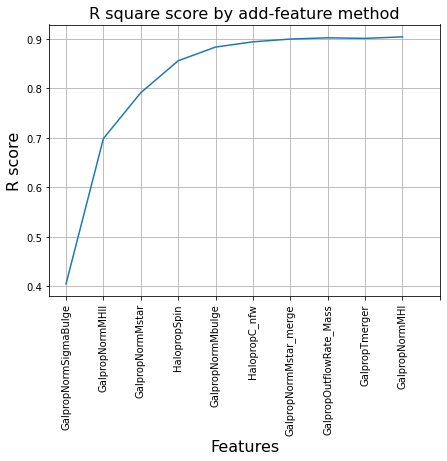

Elapsed time to run RF func on Groups 5-8: 4928.743 seconds


In [23]:
# this code takes 4928.743 seconds ~ 1.4hrs to run when the dataset is Groups 5-8 galaxies with 20,000 entries
# and 10 most important features
start_time = time.time()

RF_results_58 = functions.target_predicting_RF_function(X=X_58_sample, y=y_58_sample)

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func on Groups 5-8: {elapsed_time:.3f} seconds")

##### RF best parameters for Groups 5-8, Elliptical Galaxies with 0.4<$\frac{M_{bulge}}{M_{star}}$<=0.8:

    Fitting 5 folds for each of 27 candidates, totalling 135 fits
    Best params, best score: 0.8996 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
    RF Accuracy: 0.90 (+/- 0.02)      

#### The most important features for Groups 5-8 galaxies are: 

	 1 GalpropNormSigmaBulge 0.4050370019399696
	 2 GalpropNormMHII 0.6987150733973168
	 3 GalpropNormMstar 0.7913317480916368
	 4 HalopropSpin 0.8557956879843682
	 5 GalpropNormMbulge 0.8835250088633764
	 6 HalopropC_nfw 0.8940790166287277
	 7 GalpropNormMstar_merge 0.8996939667589668
	 8 GalpropOutflowRate_Mass 0.9022044104100143
	 9 GalpropTmerger 0.9010711859306745
	 10 GalpropNormMHI 0.9041348701274016


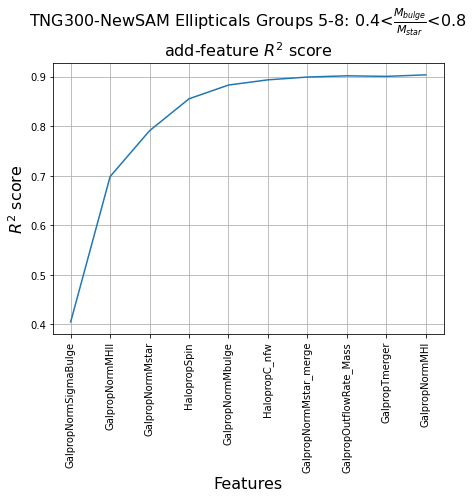

In [24]:
group58_fig_add_feature=RF_results_58[4].plot(x='features', y='r_sq_score', rot=90, figsize=(7,5), use_index=True,
                    legend=False, grid=True, 
                    xticks=range(0,10))
group58_fig_add_feature.set_title(label= r'TNG300-NewSAM Ellipticals Groups 5-8: 0.4<$\frac{M_{bulge}}{M_{star}}$<0.8' + '\n' + r'add-feature $R^{2}$ score',fontsize=16)
group58_fig_add_feature.set_xlabel('Features',fontsize=16)
group58_fig_add_feature.set_ylabel(r'$R^{2}$ score',fontsize=16)

# group58_fig_add_feature.get_figure().savefig('TNG300-SAM_images/v7_TNG300-SAM_df_58/v7_TNG300_Group_58_R_score_by_add_feature_method.jpg', dpi=500)

plt.show()

In [25]:
# RF_results_58[4].to_csv('TNG300-SAM_images/v7_TNG300-SAM_df_58/v7_TNG300_Group_58_Max_r_scores_by_add_column_method.csv', index=False)

group58 = pd.read_csv('TNG300-SAM_images/v7_TNG300-SAM_df_58/v7_TNG300_Group_58_Max_r_scores_by_add_column_method.csv')

group58_fig = RF_results_58[1]
# group58_fig.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_58/v7_TNG300_Group_58_RF_Prediction_vs_True.jpeg', dpi=500)
plt.show()

group58_fig_builtin_imp = RF_results_58[2]
# group58_fig_builtin_imp.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_58/v7_TNG300_Group_58_Built_in_Feature_Ranking.jpeg', dpi=500)
plt.show()

In [26]:
# y_pred_RF_df_58 = RF_results_58[0]
# y_pred_RF_df_58 = pd.DataFrame({'y_pred_RF Group 58': y_pred_RF_df_58})

# y_pred_RF_df_58.to_csv('TNG300-SAM_images/v7_TNG300-SAM_df_58/v7_TNG300-NewSAM_Group_58_y_pred_RF_predicted_sizes.csv', index=False)

y_pred_RF_58 = pd.read_csv('TNG300-SAM_images/v7_TNG300-SAM_df_58/v7_TNG300-NewSAM_Group_58_y_pred_RF_predicted_sizes.csv')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params, best score: 0.8990 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}
RF Accuracy: 0.90 (+/- 0.02)


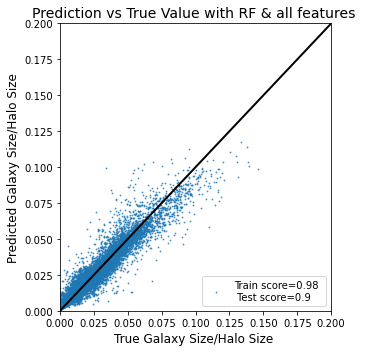

Elapsed time to compute the importances: 0.038 seconds


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Elapsed time to compute the importances: 22.196 seconds


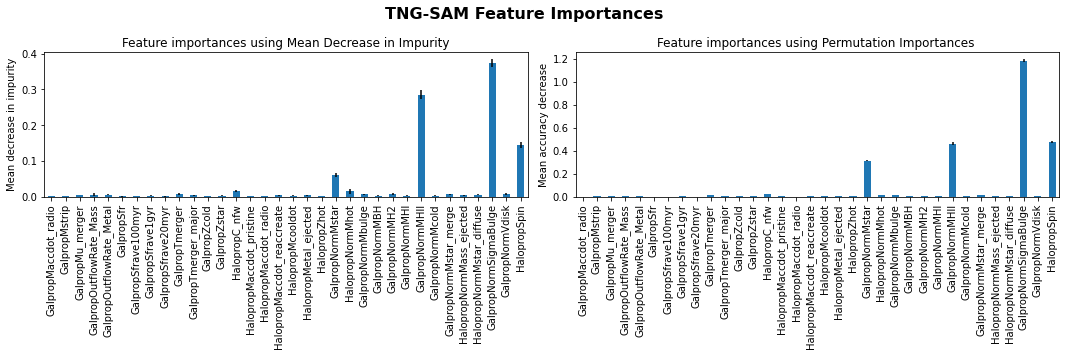

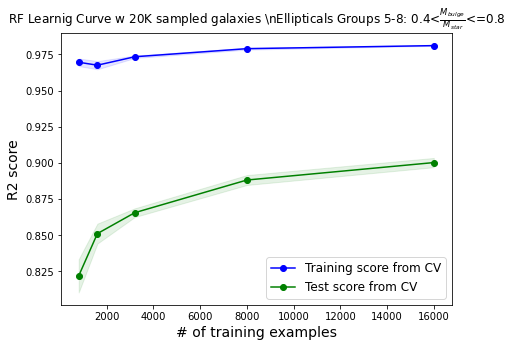

Elapsed time to run RF func and Learning Curves on Groups 5-8 (0.4<B/M<0.8): 621.293 seconds


In [27]:
# this code takes 621.293 seconds ~ 10min to run when the dataset is Groups 5-8 galaxies with 20,000 entries 
start_time = time.time()

RF_lc_58 = tp_lc_functions.target_predicting_RF_function(X_58_sample, y_58_sample, r'RF Learnig Curve w 20K sampled galaxies \n' + \
                                                         r'Ellipticals Groups 5-8: 0.4<$\frac{M_{bulge}}{M_{star}}$<=0.8')

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func and Learning Curves on Groups 5-8 (0.4<B/M<0.8): {elapsed_time:.3f} seconds")

In [28]:
lc_58 = RF_lc_58[4]
# lc_58.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_58/v7_TNG300_Group_58_RF_Learning_Curve.jpeg', dpi=500)

### <font color='purple'> <a id =6> </a> <br> Groups 5-8: SR equation search 